In [42]:
import torch_geometric
import torch
import networkx as nx
from networkx import DiGraph
from typing import Optional, List, Any, Tuple
from torch_geometric.utils.convert import from_networkx
from heapq import heapify
import random
import torch.nn as nn

In [47]:
def parent(i: int) -> Optional[int]:
    if i <= 0:
        return None
    return (i - 1) // 2

def is_heap(l) -> bool:
    for (i, e) in enumerate(l):
        p = parent(i)
        if p is not None and l[p] > e:
            return False
    return True

In [16]:
TOKEN_DIM = 10

In [43]:
def make_array(token_dim: int = TOKEN_DIM, min_len: int = 1, max_len: int = 32, p_heapify: float = 0.4) -> Tuple[List[int], bool]:
    result = []
    for i in range(0, random.randint(min_len, max_len)):
        result.append(list(torch.randn(token_dim)))
    if random.random() < p_heapify: 
        heapify(result)
        result_is_heap = True
    else:
        result_is_heap = is_heap(result)
    return (torch.tensor(result), result_is_heap)

In [56]:
for i in range(0, 5):
    arr = make_array()
    print(f"Example {i} has shape {tuple(arr[0].shape)} and {'is' if arr[1] else 'is not'} a heap")

Example 0 has shape (7, 10) and is a heap
Example 1 has shape (15, 10) and is not a heap
Example 2 has shape (1, 10) and is a heap
Example 3 has shape (10, 10) and is not a heap
Example 4 has shape (3, 10) and is not a heap


In [33]:
def heapgraph(n: int) -> DiGraph:
    result = DiGraph()
    result.add_nodes_from(range(0, n))
    result.add_edges_from(
        (parent(i), i) for i in range(0, n) if parent(i) is not None
    )
    return result

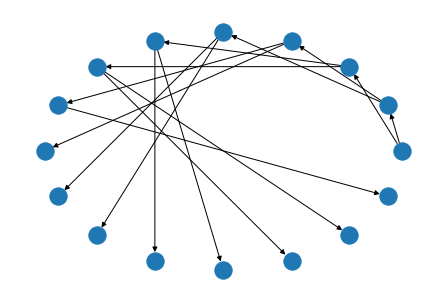

In [40]:
import matplotlib.pyplot as plt
nx.draw_circular(heapgraph(16))

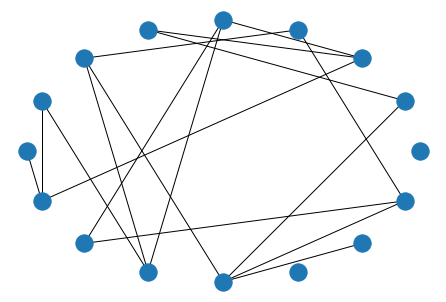

In [72]:
nx.draw_circular(nx.erdos_renyi_graph(16, 3/16))

In [79]:
def make_datapoint(token_dim: int = TOKEN_DIM, min_len: int = 1, max_len: int = 32, p_heapify: float = 0.4, p_heap_graph: float = 0.4) -> List[int]:
    (nodes, is_heap) = make_array(token_dim, min_len, max_len, p_heapify)
    n = nodes.shape[0]
    heapgraph_ = heapgraph(n)
    if random.random() < p_heap_graph: 
        graph = heapgraph_
        is_heapgraph = True
    else:
        graph = nx.erdos_renyi_graph(n, 3/(n + 1), directed=True)
        is_heapgraph = graph == heapgraph_
    
    data = from_networkx(graph)
    data.x = nodes
    data.y = torch.tensor([
        float(is_heap),
        float(is_heapgraph)
    ])

    return data

In [85]:
for i in range(0, 10):
    data = make_datapoint()
    print(f"Example {i}: {data} (y = {data.y})")

Example 0: Data(edge_index=[2, 22], x=[23, 10], y=[2]) (y = tensor([0., 1.]))
Example 1: Data(edge_index=[2, 9], x=[4, 10], y=[2]) (y = tensor([1., 0.]))
Example 2: Data(edge_index=[2, 22], x=[23, 10], y=[2]) (y = tensor([0., 1.]))
Example 3: Data(edge_index=[2, 86], x=[27, 10], y=[2]) (y = tensor([0., 0.]))
Example 4: Data(edge_index=[2, 2], x=[3, 10], y=[2]) (y = tensor([1., 1.]))
Example 5: Data(edge_index=[2, 25], x=[26, 10], y=[2]) (y = tensor([1., 1.]))
Example 6: Data(edge_index=[2, 16], x=[17, 10], y=[2]) (y = tensor([0., 1.]))
Example 7: Data(edge_index=[2, 13], x=[14, 10], y=[2]) (y = tensor([0., 1.]))
Example 8: Data(edge_index=[2, 11], x=[12, 10], y=[2]) (y = tensor([1., 1.]))
Example 9: Data(edge_index=[2, 19], x=[10, 10], y=[2]) (y = tensor([0., 0.]))


In [86]:
def generate_data(n: int, token_dim: int = TOKEN_DIM, min_len: int = 1, max_len: int = 32, p_heapify: float = 0.4):
    for _ in range(0, n):
        yield make_datapoint(token_dim, min_len, max_len, p_heapify)

In [87]:
list(generate_data(10))

[Data(edge_index=[2, 68], x=[21, 10], y=[2]),
 Data(edge_index=[2, 51], x=[22, 10], y=[2]),
 Data(edge_index=[2, 49], x=[18, 10], y=[2]),
 Data(edge_index=[2, 48], x=[16, 10], y=[2]),
 Data(edge_index=[2, 11], x=[12, 10], y=[2]),
 Data(edge_index=[2, 46], x=[16, 10], y=[2]),
 Data(edge_index=[2, 34], x=[15, 10], y=[2]),
 Data(edge_index=[2, 46], x=[18, 10], y=[2]),
 Data(edge_index=[2, 77], x=[25, 10], y=[2]),
 Data(edge_index=[2, 23], x=[7, 10], y=[2])]